In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

import torch
import scgen
from feature_attribution_sc.explainers.mask import mask, generate_rankings, 
from feature_attribution_sc.models.scgen_models import SCGENCustom

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

Global seed set to 0
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()
2023-03-13 18:55:53.040727: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-13 18:55:53.040892: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-13 18:55:53.040897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing librari

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.10.0 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.3 pynndescent==0.5.7


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
data_path='/home/yuge/feature-attribution-sc'

feature_importance_files = [
#     f'{data_path}/outputs/baselines/task1_random.csv',
    f'{data_path}/outputs/differential_expression/task1_DE_control.csv',  # these are way slower for some reason???
    f'{data_path}/outputs/expected_gradients/task1_absolute_expected_grads_v2.csv'
]

thresholds = np.array(range(10, 100, 10))

In [5]:
adata = sc.read(f'{data_path}/datasets/2301_scgen_norman19.h5ad')

### Train new models

Train a new scGen model per attribution dataframe and per threshold representing the percentage of data points ablated. Significantly decreased performance _after_ training indicates the data points ablated were significant/unable to be replaced by correlated variables per Hooker 2019.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Only using attributions for 880 genes.
training at threshold = 0
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [17:17<00:00, 20.75s/it, loss=40.1, v_num=1]


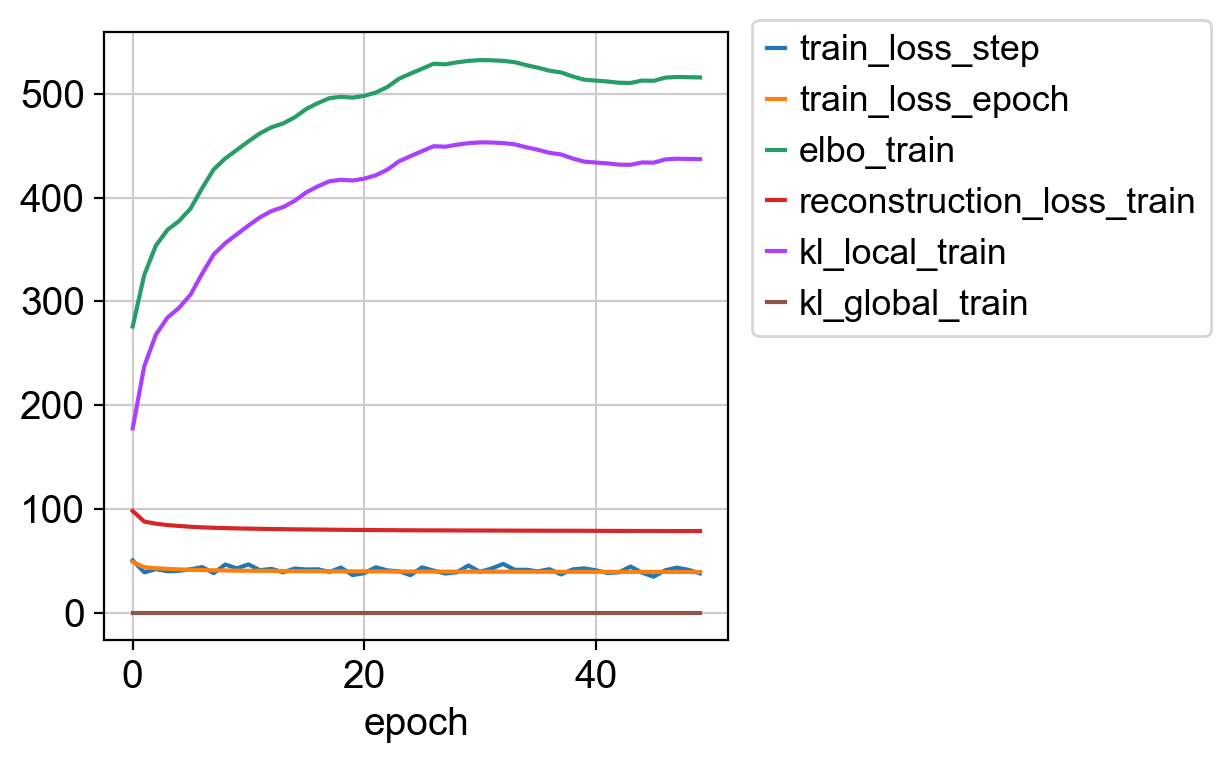

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 20
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [17:42<00:00, 21.25s/it, loss=41.5, v_num=1]


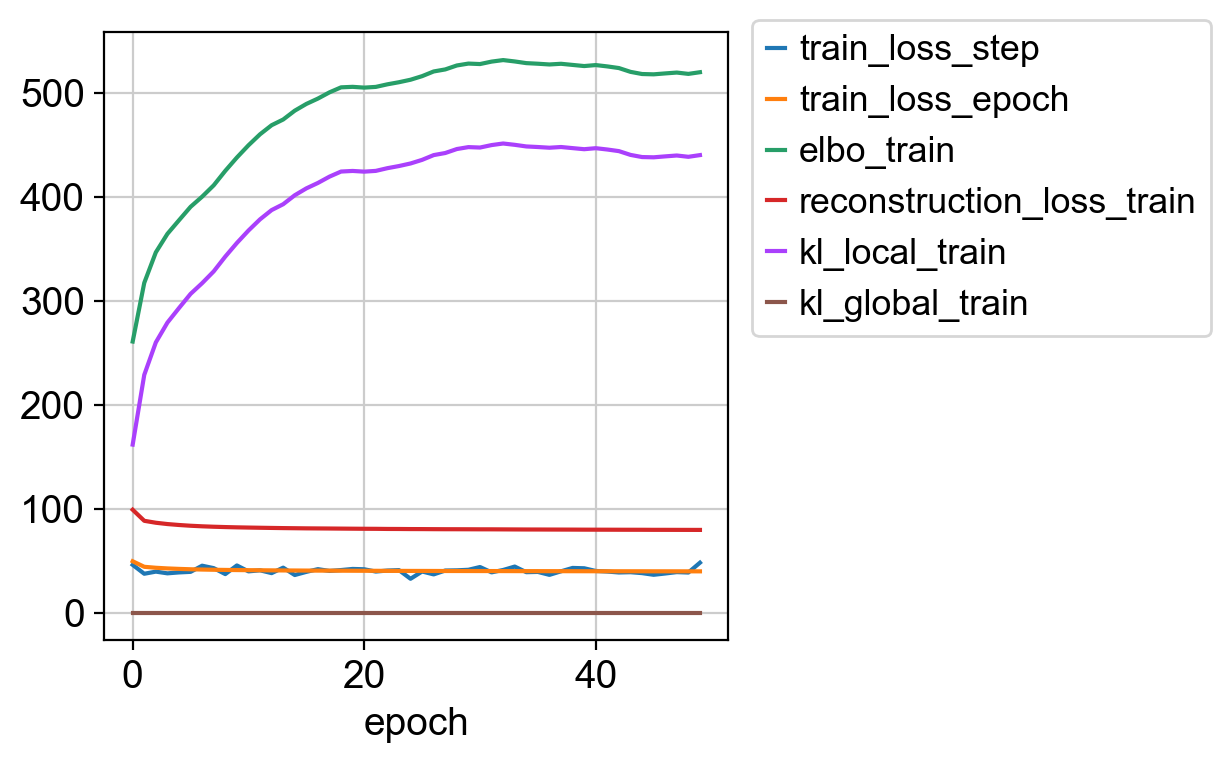

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 30
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [18:28<00:00, 22.17s/it, loss=39.9, v_num=1]


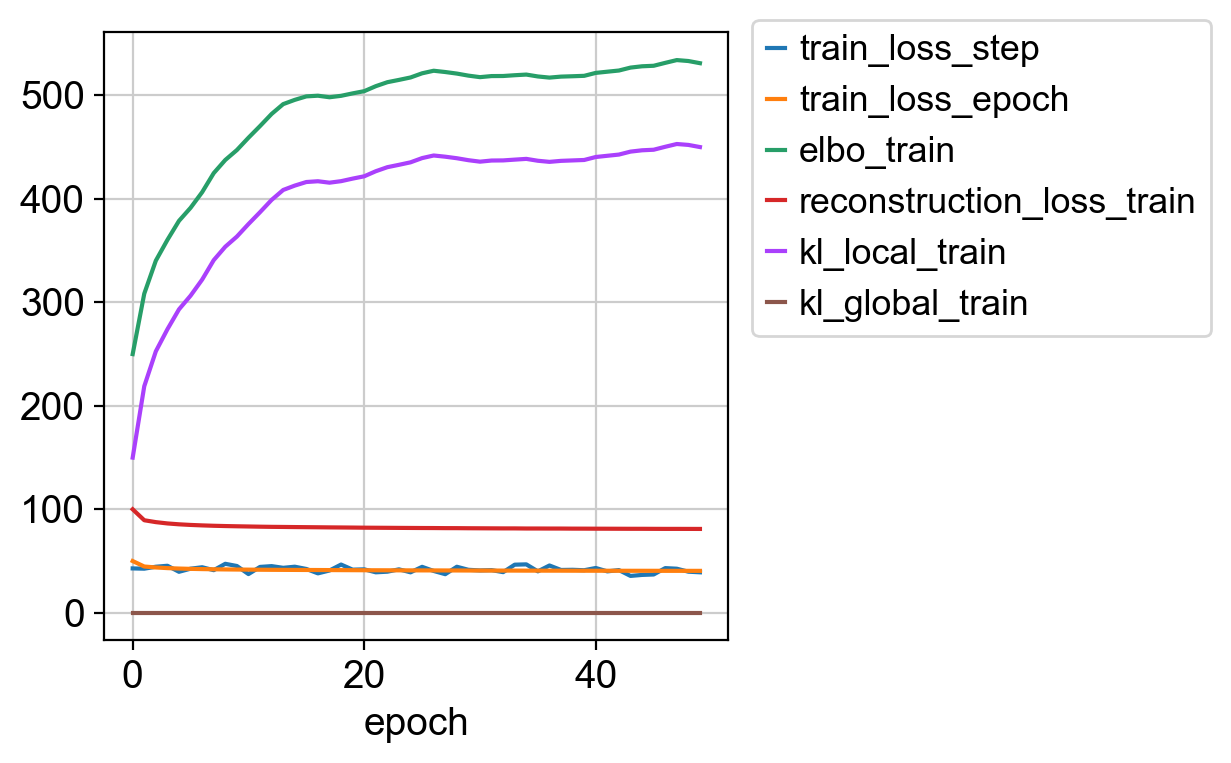

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 40
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [19:13<00:00, 23.06s/it, loss=40.8, v_num=1]


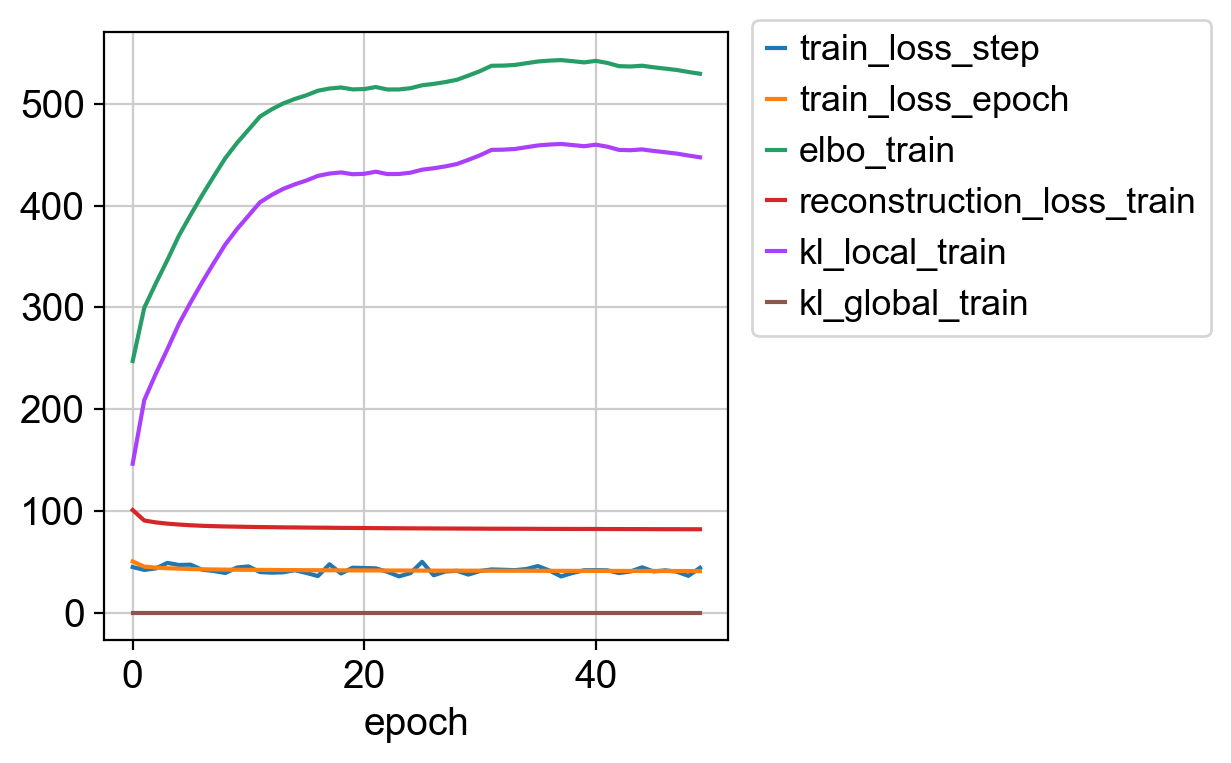

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 50
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [19:51<00:00, 23.83s/it, loss=42.6, v_num=1]


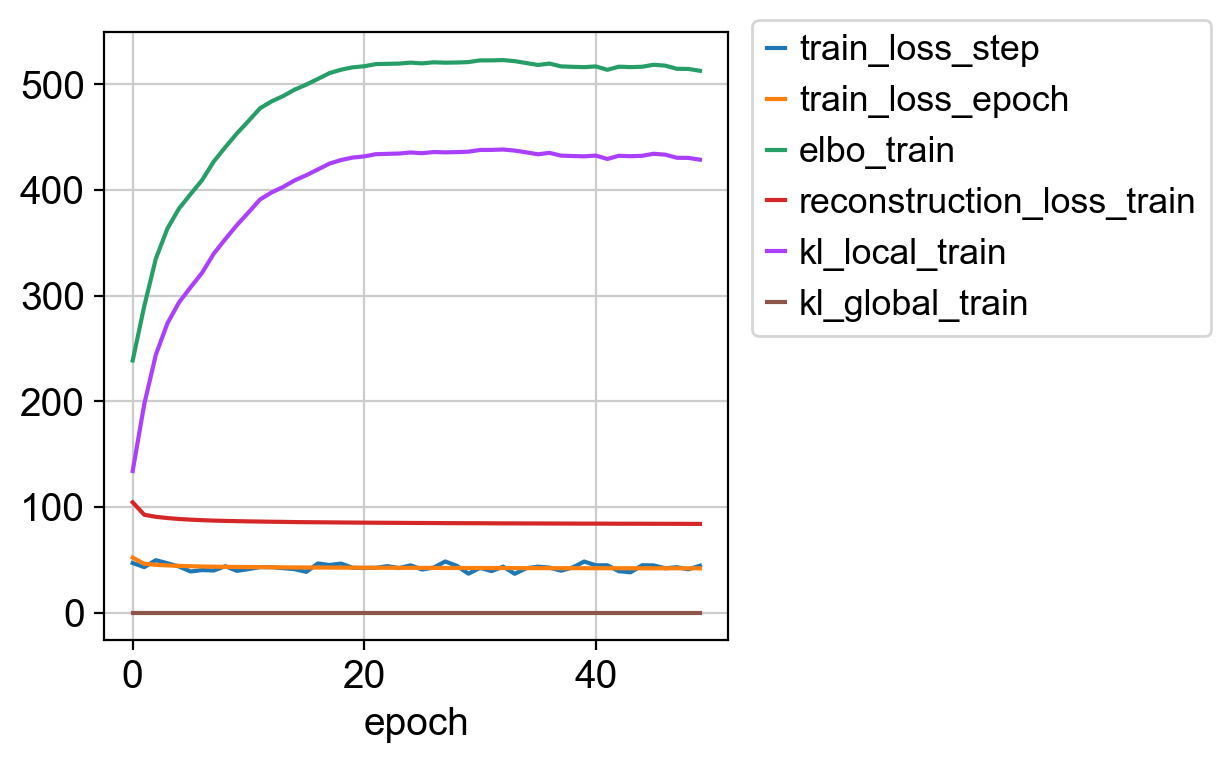

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 60
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [20:10<00:00, 24.21s/it, loss=42.7, v_num=1]


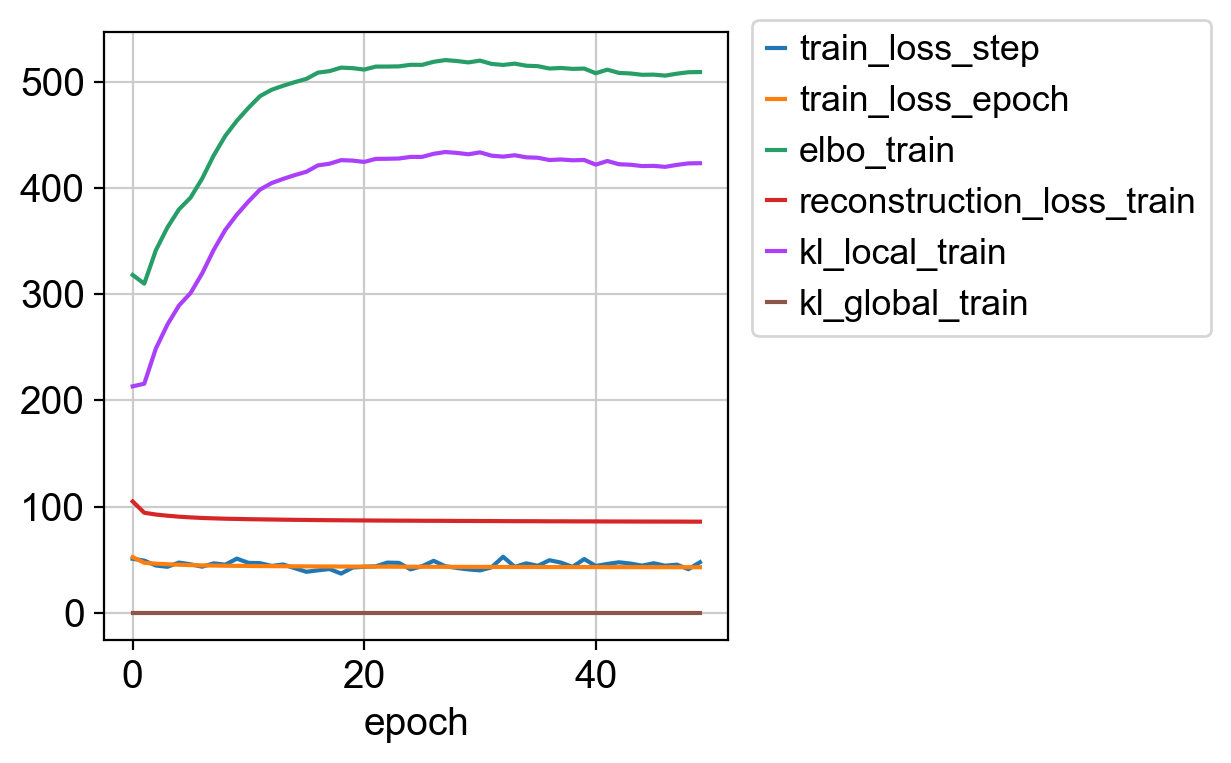

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 70
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [20:19<00:00, 24.39s/it, loss=42.7, v_num=1]


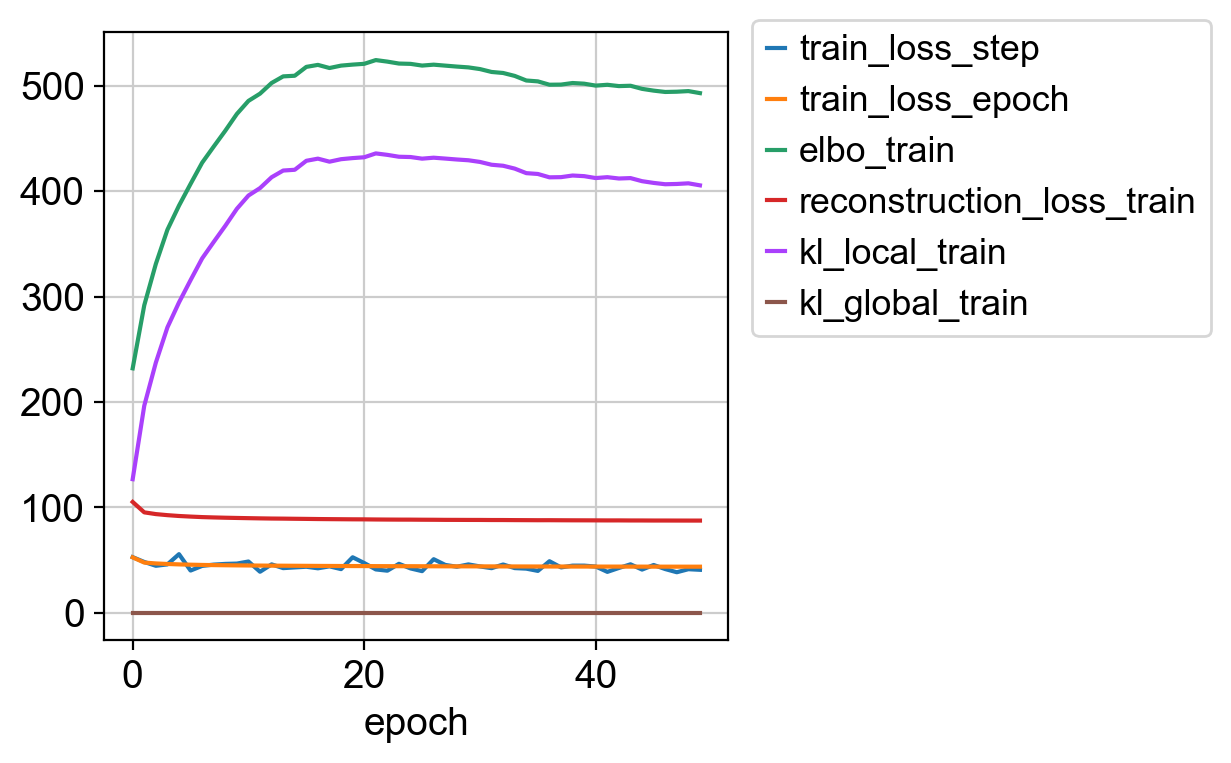

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 80
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [20:49<00:00, 24.99s/it, loss=44.7, v_num=1]


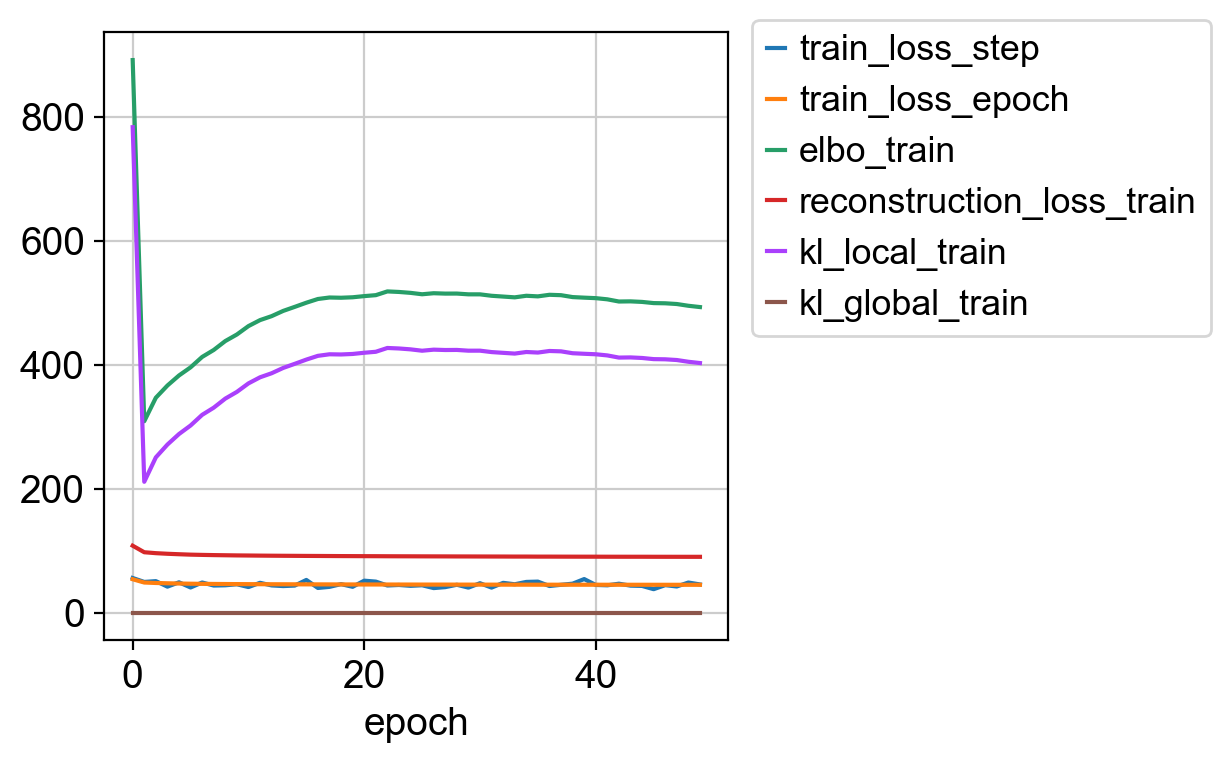

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 90
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [21:34<00:00, 25.89s/it, loss=47.1, v_num=1]


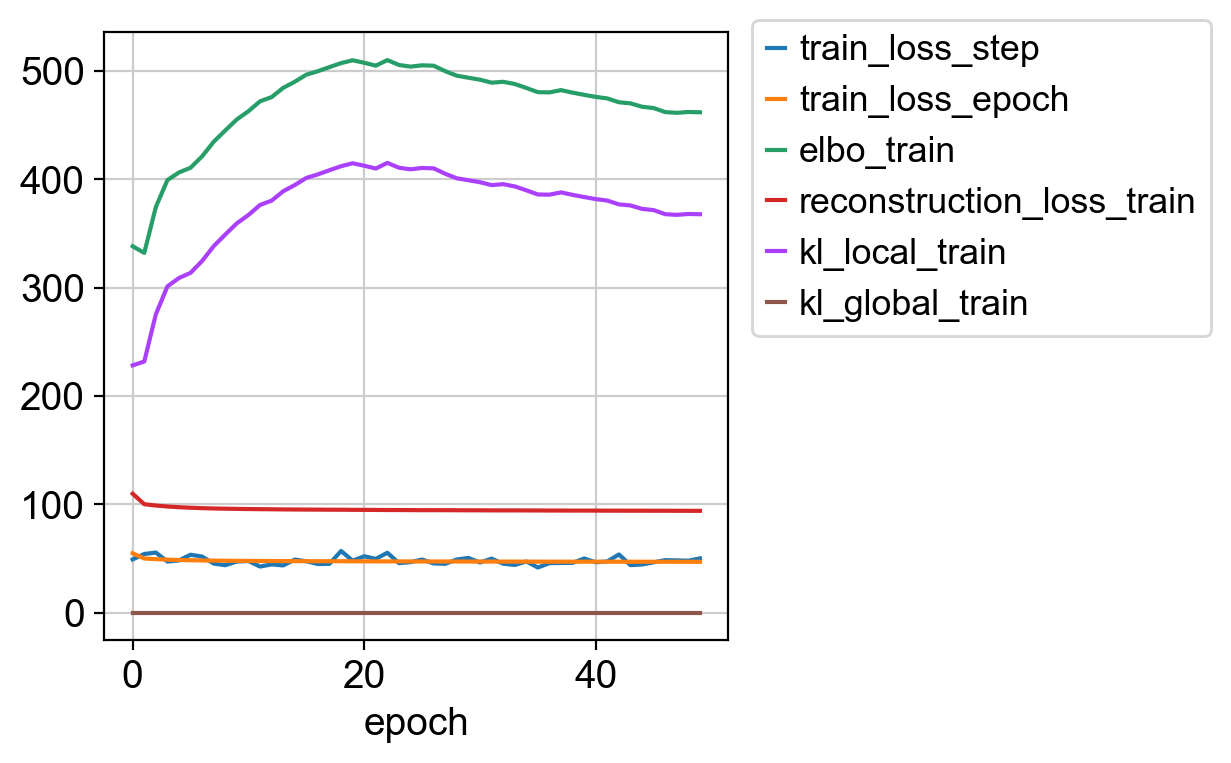

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Only using attributions for 880 genes.
training at threshold = 0
Generating rankings for 107 labels and 880 features.
Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [17:35<00:00, 21.11s/it, loss=38.3, v_num=1]


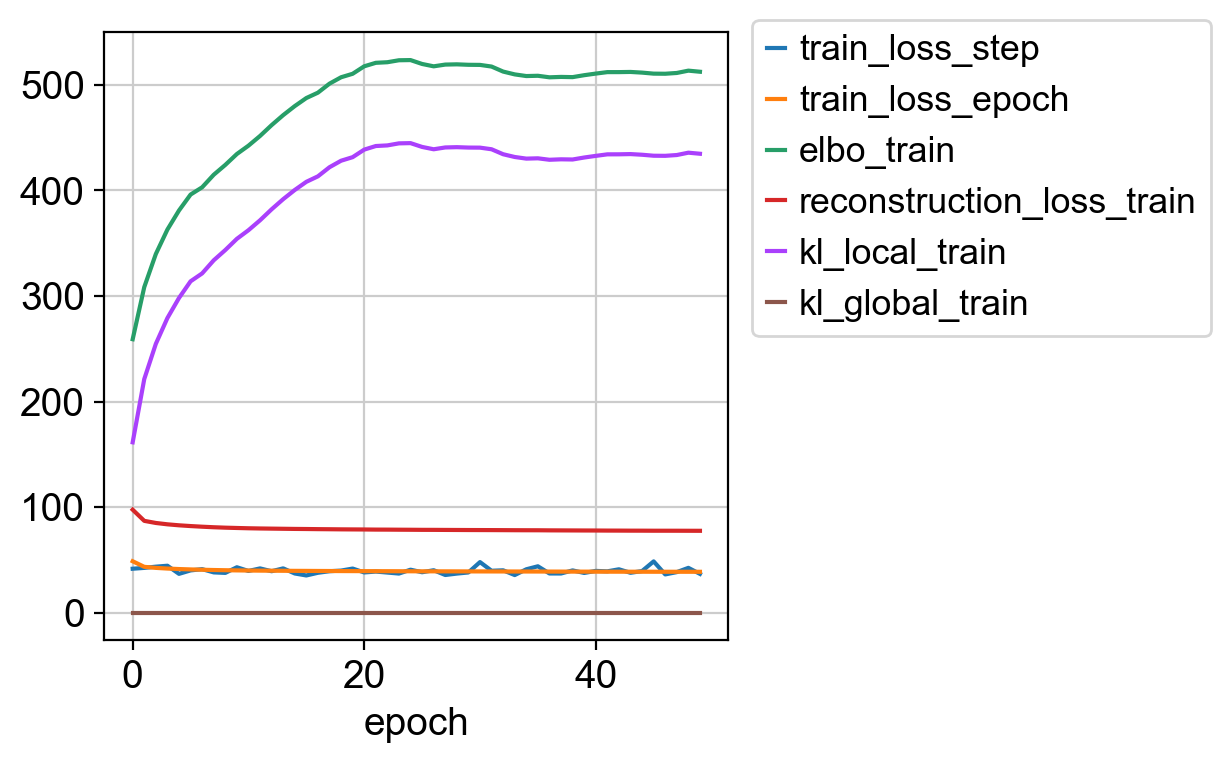

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


training at threshold = 10
Generating rankings for 107 labels and 880 features.


IPU available: False, using: 0 IPUs


Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [21:20<00:00, 25.61s/it, loss=39.1, v_num=1]


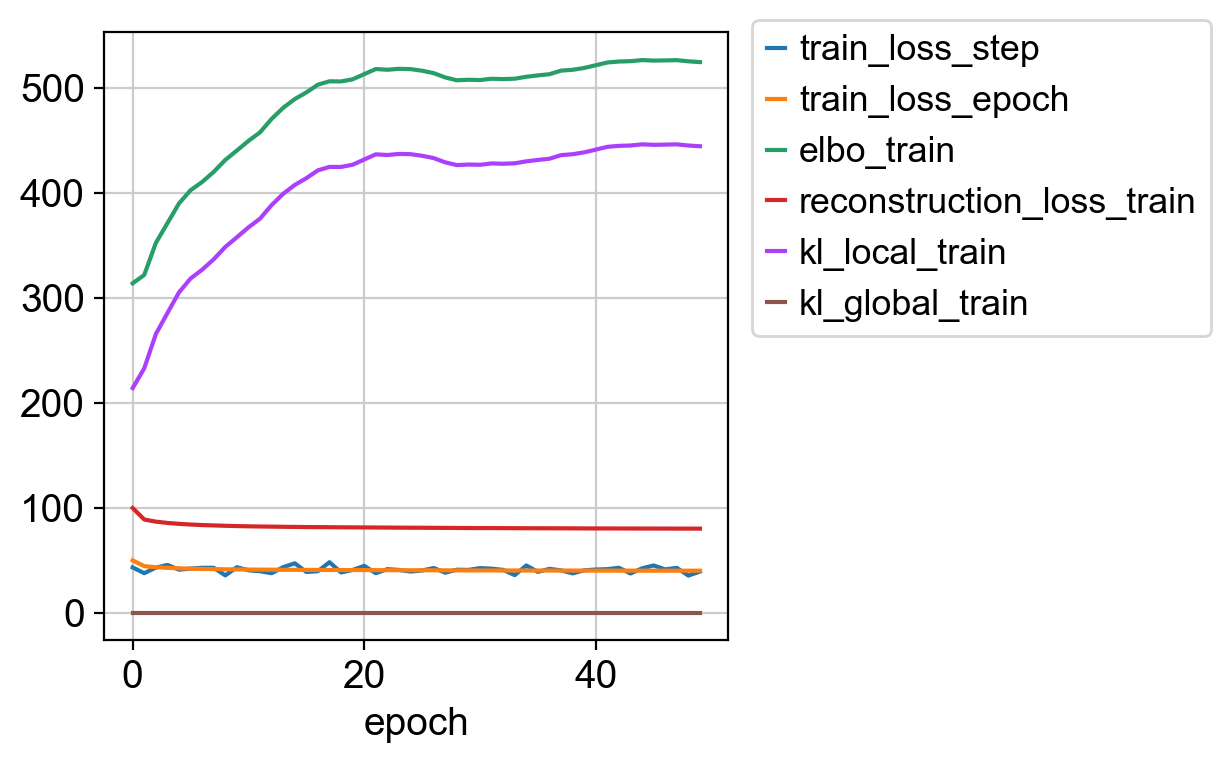

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


training at threshold = 20
Generating rankings for 107 labels and 880 features.
Epoch 1/50:   0%|                                                                                                                                                                                                                  | 0/50 [6:51:51<?, ?it/s]


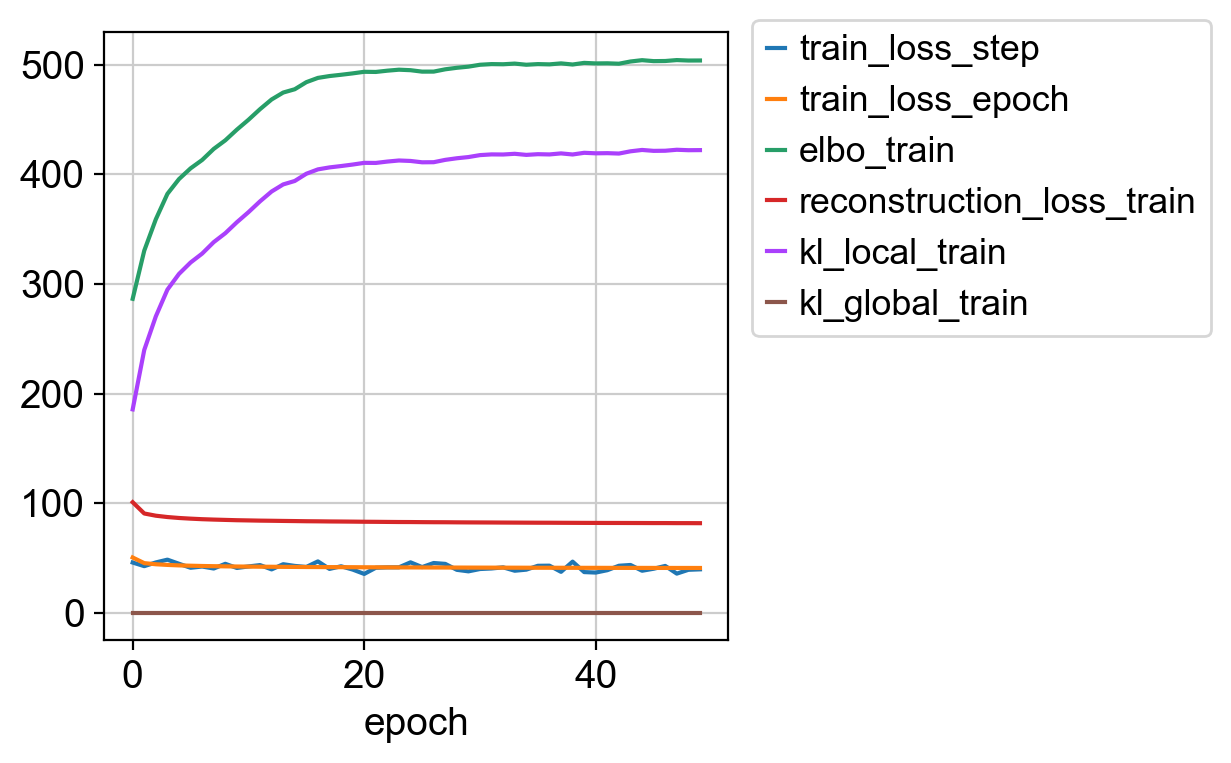

training at threshold = 30
Generating rankings for 107 labels and 880 features.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [19:43<00:00, 23.68s/it, loss=42.2, v_num=1]


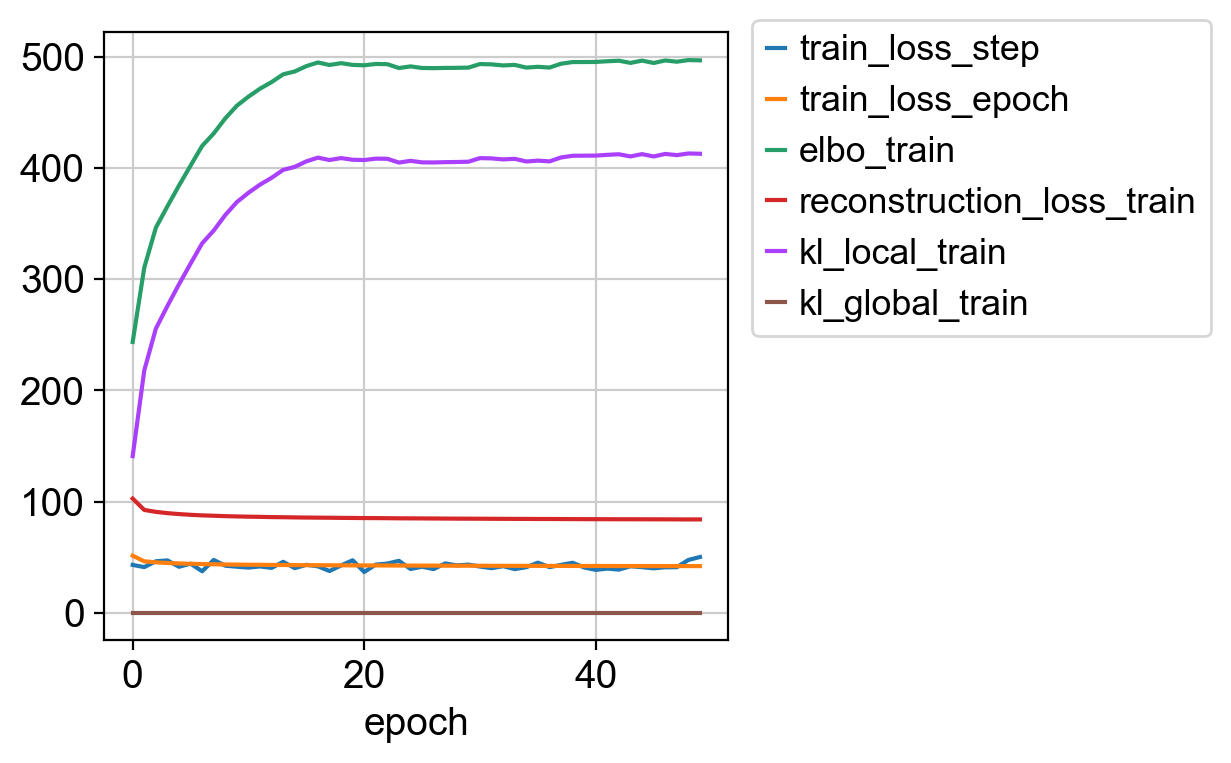

training at threshold = 40
Generating rankings for 107 labels and 880 features.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Epoch 11/50:  20%|████████████████████████████████████▍                                                                                                                                                 | 10/50 [04:15<17:13, 25.84s/it, loss=46.2, v_num=1]

In [ ]:
for feature_importance in feature_importance_files:
    attrib_df = pd.read_csv(feature_importance)
    attrib_key = feature_importance.split("/")[-2]

    # reverse order for DE
    if 'differential_expression' in feature_importance:
        attrib_df[attrib_df.columns[1:]] *= -1

    # todo: should include a check for adata.var_names vs attrib_df.gene_symbols

    n_features = attrib_df.shape[0]
    if n_features < adata.shape[1]:
        raise ValueError(
            f"Attributions only calculated for {n_features} genes but adata has {adata.shape[1]}")
    elif n_features > adata.shape[1]:
        print(f'Only using attributions for {adata.shape[1]} genes.')
        attrib_df = attrib_df.set_index('gene_symbols').loc[adata.var_names].reset_index()

    for threshold in thresholds:
        print('training at threshold =', threshold)
        SCGENCustom.setup_anndata(adata, batch_key='perturbation_name')
        save_str = f'../models/scgen_norman19_ROAR_{attrib_key}_{threshold}'
        model = SCGENCustom(adata, feature_importance=attrib_df, threshold=threshold/100, n_hidden=400, n_latent=30)
        model.train(max_epochs=50, batch_size=32)
        model.save(save_str, overwrite=True)

        # plot performance
        pd.concat(model.history.values(), axis=1).plot()
        plt.legend(bbox_to_anchor=(1.01, 1.05))
        plt.show()
